<a href="https://colab.research.google.com/github/venkateshpyla-3/Urban_Mobility_Analysis/blob/main/Urban_Mobility_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Urban Mobility Analysis: A Case Study on Hyderabad (1990–2025)**

## **Introduction**

This project analyzes transport and population trends in Hyderabad from 1990 to 2025 using a synthetic dataset. The dataset was generated to resemble real-world patterns of population growth, transport usage, CO₂ emissions, commute times, and accidents.

The main objective is to explore:
* How transport usage has evolved with population growth
* The environmental impact of increased vehicle use
* The relationship between urban mobility and safety

Although the dataset is synthetic, it provides a useful demonstration of how data visualization can reveal insights into urban development and sustainability.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Uploading csv file to the Colab

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving hyderabad_transport.csv to hyderabad_transport (1).csv


Reading Csv file

In [ ]:
data = pd.read_csv('hyderabad_transport.csv')
data.head()

,Year,Population_millions,Bus_users,Train_users,Metro_users,Car_users,Bicycle_users,Walking_users,CO2_kilotons,Accidents_per_100k,Avg_commute_min
0,1990,4.3,2.5,0.8,NaN,0.4,0.2,0.1,480,78,28
1,1991,4.5,2.5,0.8,NaN,0.5,0.2,0.1,500,80,29
2,1992,4.6,2.6,0.8,NaN,0.5,0.2,0.1,520,81,29
3,1993,4.7,2.6,0.8,NaN,0.6,0.2,0.2,540,82,30
4,1994,4.8,2.6,0.8,NaN,0.6,0.2,0.2,560,83,31


Filling the NaN, Unknown values with 0

In [ ]:
data = data.fillna(0)
data.head()

,Year,Population_millions,Bus_users,Train_users,Metro_users,Car_users,Bicycle_users,Walking_users,CO2_kilotons,Accidents_per_100k,Avg_commute_min
0,1990,4.3,2.5,0.8,0.0,0.4,0.2,0.1,480,78,28
1,1991,4.5,2.5,0.8,0.0,0.5,0.2,0.1,500,80,29
2,1992,4.6,2.6,0.8,0.0,0.5,0.2,0.1,520,81,29
3,1993,4.7,2.6,0.8,0.0,0.6,0.2,0.2,540,82,30
4,1994,4.8,2.6,0.8,0.0,0.6,0.2,0.2,560,83,31


To better understand trends, we create new derived metrics such as total vehicle users and CO₂ per capita.

In [ ]:

data["CO2_per_capita"] = (data["CO2_kilotons"] * 1000) / (data["Population_millions"] * 1000000)

data["Total_vehicle_users"] = data["Bus_users"]+data["Train_users"]+data["Metro_users"]+data["Car_users"]+data["Bicycle_users"]

data.head()

,Year,Population_millions,Bus_users,Train_users,Metro_users,Car_users,Bicycle_users,Walking_users,CO2_kilotons,Accidents_per_100k,Avg_commute_min,CO2_per_capita,Total_vehicle_users
0,1990,4.3,2.5,0.8,0.0,0.4,0.2,0.1,480,78,28,0.111628,3.9
1,1991,4.5,2.5,0.8,0.0,0.5,0.2,0.1,500,80,29,0.111111,4.0
2,1992,4.6,2.6,0.8,0.0,0.5,0.2,0.1,520,81,29,0.113043,4.1
3,1993,4.7,2.6,0.8,0.0,0.6,0.2,0.2,540,82,30,0.114894,4.2
4,1994,4.8,2.6,0.8,0.0,0.6,0.2,0.2,560,83,31,0.116667,4.2


## **Data Visualisation of Various Trends**

**Mode of Share over time**

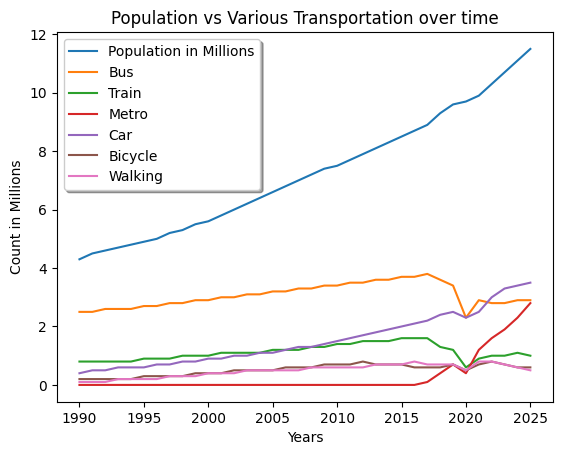

In [ ]:
plt.xlabel("Years")
plt.ylabel("Count in Millions")
plt.title("Population vs Various Transportation over time")
sns.lineplot(data = data, x="Year",y="Population_millions",label="Population in Millions")
sns.lineplot(data = data,x="Year",y="Bus_users",label="Bus")
sns.lineplot(data = data,x="Year",y="Train_users",label="Train")
sns.lineplot(data = data,x="Year",y="Metro_users",label="Metro")
sns.lineplot(data = data,x="Year",y="Car_users",label="Car")
sns.lineplot(data = data,x="Year",y="Bicycle_users",label="Bicycle")
sns.lineplot(data = data,x="Year",y="Walking_users",label="Walking")
plt.legend(shadow=True)
plt.show()

This chart illustrates the fascinating evolution of transportation methods and their correlation with population growth. The introduction of the metro in 2017 marked a significant turning point, leading to a dramatic increase in its ridership.

**StackPlot Showing Transport Mode Share Over Time**

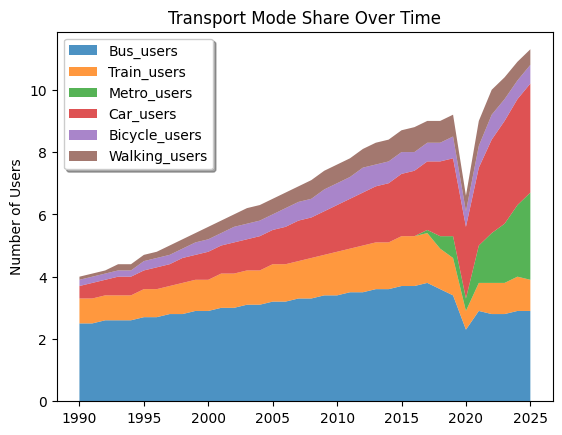

In [ ]:
modes = ["Bus_users","Train_users","Metro_users","Car_users","Bicycle_users","Walking_users"]

plt.stackplot(data["Year"], [data[m] for m in modes], labels=modes, alpha=0.8)
plt.legend(loc="upper left",shadow=True)
plt.title("Transport Mode Share Over Time")
plt.ylabel("Number of Users")
plt.show()

This visualization shows how different transport modes gained or lost popularity over the years in a better way than the line plot.

**LinePlot of Total Vehicle Users Over Time**

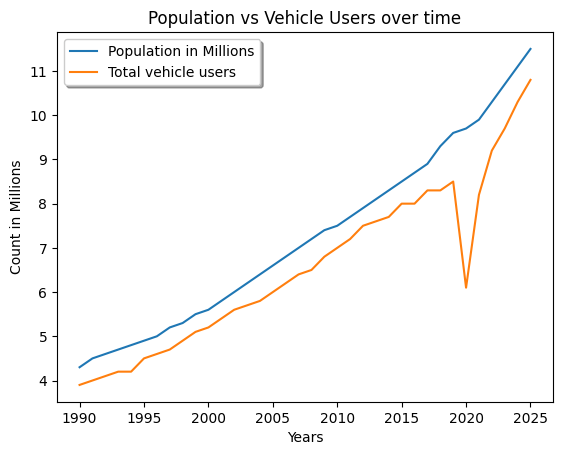

In [ ]:
plt.xlabel("Years")
plt.ylabel("Count in Millions")
plt.title("Population vs Vehicle Users over time")
sns.lineplot(data = data, x="Year",y="Population_millions",label="Population in Millions")
sns.lineplot(data = data,x="Year",y="Total_vehicle_users",label="Total vehicle users")
plt.legend(shadow=True)
plt.show()

This shows how population growth compares with the adoption of vehicles (bus+train+metro+car). The sudden fall of usage of vehicles around 2020 is due to the COVID-19.

**Transport Trends**

Hyderabad’s growing population has driven a shift in transport choices.

* In the early 1990s, buses and trains formed the backbone of mobility.
* After 2010, private car use and metro ridership expanded rapidly.
* Bicycles and walking has not increased with population growth.

These trends highlight the city’s move toward motorized transport, reflecting modernization but also contributing to congestion and pollution.

**BarPlot **Showing** CO2 Emissions**

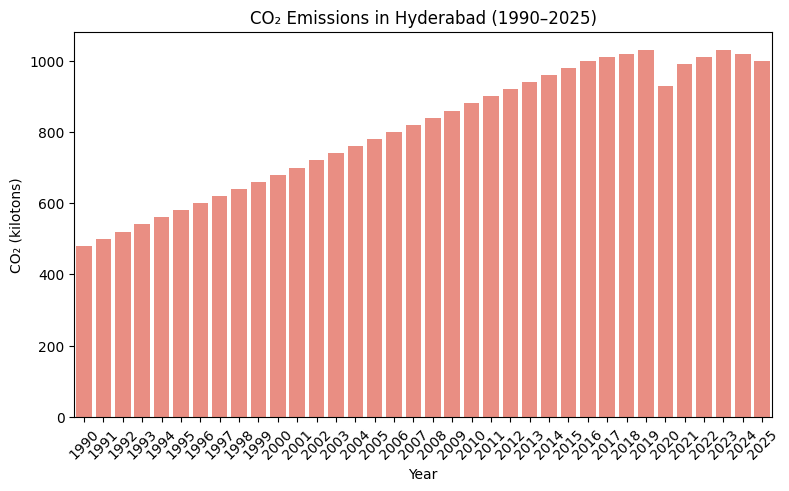

In [ ]:
plt.figure(figsize=(9,5))
sns.barplot(data=data, x="Year", y="CO2_kilotons", color="salmon")
plt.xticks(rotation=45)
plt.title("CO₂ Emissions in Hyderabad (1990–2025)")
plt.ylabel("CO₂ (kilotons)")
plt.show()


The bar chart clearly shows periods of high emissions. If you highlight 2000s vs 2010s, it shows rapid urban growth impact. We can see the decline of CO2 emission after 2022. This decline highlights the impact of moving towards green energy sources

**JointPlot showing Distribution of Commute time & CO2 Emission**

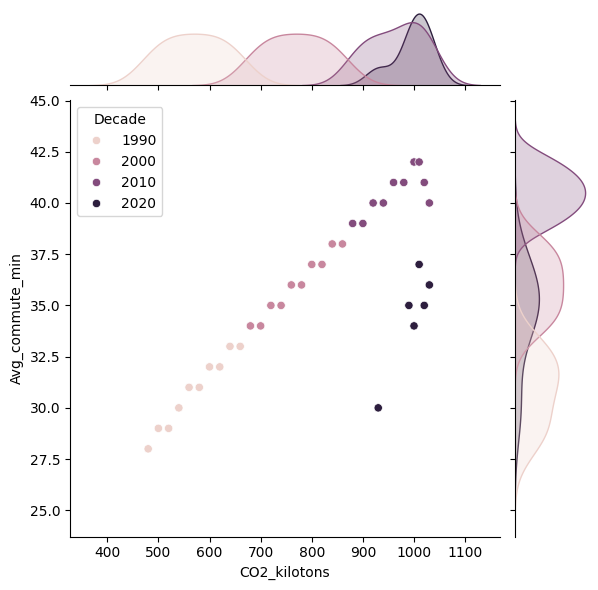

In [ ]:
data["Decade"] = (data["Year"] // 10) * 10

sns.jointplot(data=data, x="CO2_kilotons", y="Avg_commute_min", kind="scatter", hue="Decade")

This shows whether higher emissions coincide with longer commute times, suggesting congestion worsened air quality.

**BoxPlot showing Average Commute Time Distribution**

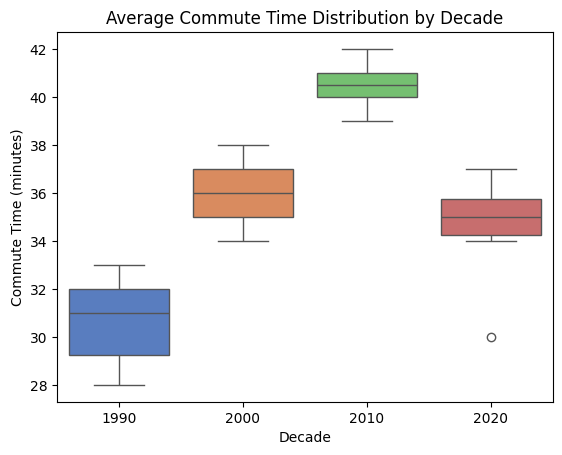

In [ ]:
sns.boxplot(data=data, x="Decade", y="Avg_commute_min",hue='Decade', palette="muted", legend=False)
plt.title("Average Commute Time Distribution by Decade")
plt.ylabel("Commute Time (minutes)")
plt.show()

This boxplot shows that average commute times have risen over the years, a trend tied directly to rapid urbanization. However, recent data shows a decline in these times, likely due to factors like the rise of remote work, expansion of public transportation, and the use of technological solutions for traffic management.

**Environmental Impact**

The surge in vehicle users has had direct consequences for the environment:

* CO₂ emissions have increased significantly with the rise in private cars.
* Commute times have become longer, suggesting traffic congestion.
* Per-capita CO₂ emissions highlight sustainability challenges as the population grows.

These indicators show how transport growth impacts both the environment and quality of life.

**ScatterPlot showing Accidents and its relation with Population, Total Vehicles**

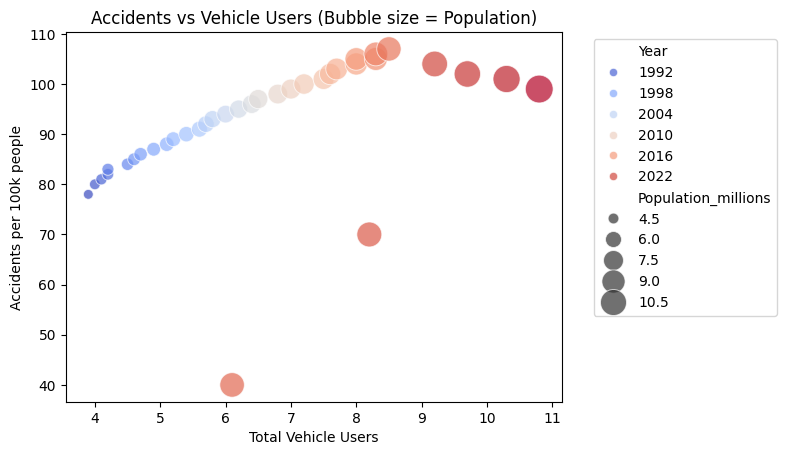

In [ ]:
sns.scatterplot(data=data,x="Total_vehicle_users",y="Accidents_per_100k",size="Population_millions",hue="Year",palette="coolwarm",alpha=0.7,sizes=(50,400))
plt.title("Accidents vs Vehicle Users (Bubble size = Population)")
plt.xlabel("Total Vehicle Users")
plt.ylabel("Accidents per 100k people")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()

This shows not only the relationship between accidents and vehicles but also how population growth magnifies the risk.

**Safety**

With more vehicles on the road, the rate of accidents per 100k people has also increased. This emphasizes the trade-off between improved mobility and road safety. The trend suggests the need for better traffic management and safety regulations.

**HeatMap**

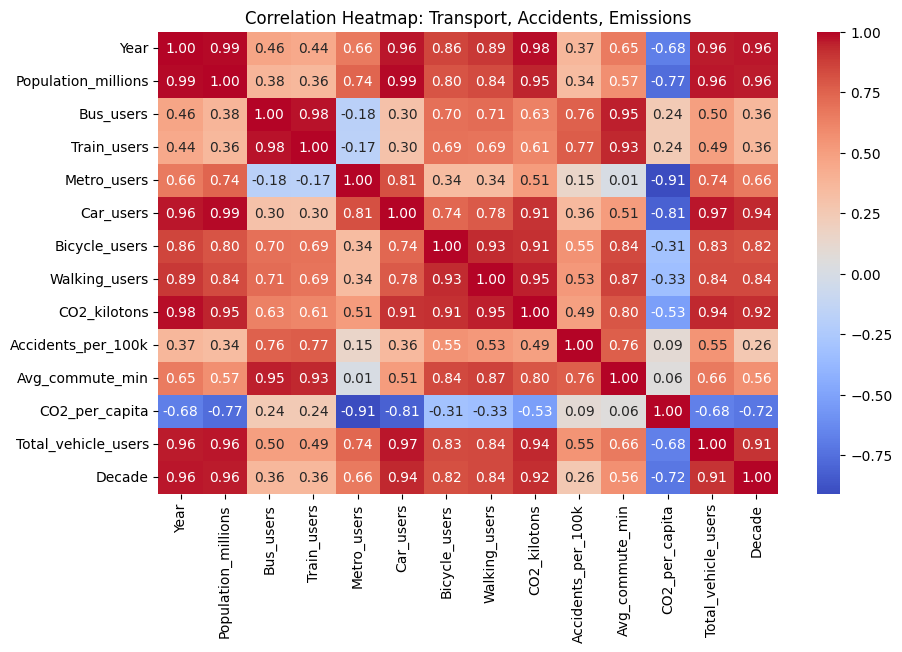

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap: Transport, Accidents, Emissions")
plt.show()

This correlation heatmap gives a high-level view of relationships among all variables

**Forecasting Vehicles and CO₂**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


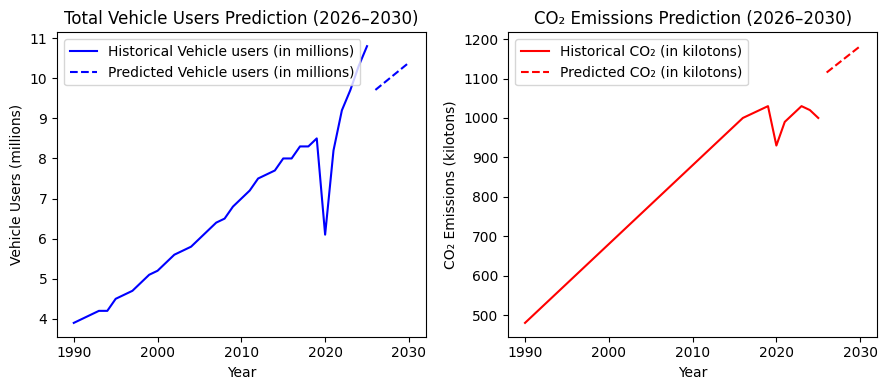

In [ ]:
from sklearn.linear_model import LinearRegression

X = data[['Year']]
y_vehicles = data['Total_vehicle_users']
y_co2 = data['CO2_kilotons']

model_vehicles = LinearRegression().fit(X, y_vehicles)
model_co2 = LinearRegression().fit(X, y_co2)

future_years = np.arange(2026, 2031).reshape(-1, 1)
future_vehicles = model_vehicles.predict(future_years)
future_co2 = model_co2.predict(future_years)

future_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted_Total_Vehicle_Users': future_vehicles,
    'Predicted_CO2_kilotons': future_co2
})

fig, axes = plt.subplots(1, 2, figsize=(9,4))

axes[0].plot(data['Year'], data['Total_vehicle_users'], label="Historical Vehicle users (in millions)", color="blue")
axes[0].plot(future_df['Year'], future_df['Predicted_Total_Vehicle_Users'],
             label="Predicted Vehicle users (in millions)", color="blue", linestyle="--")
axes[0].set_title("Total Vehicle Users Prediction (2026–2030)")
axes[0].set_xlabel("Year")
axes[0].set_ylabel("Vehicle Users (millions)")
axes[0].legend()

axes[1].plot(data['Year'], data['CO2_kilotons'], label="Historical CO₂ (in kilotons)", color="red")
axes[1].plot(future_df['Year'], future_df['Predicted_CO2_kilotons'],
             label="Predicted CO₂ (in kilotons)", color="red", linestyle="--")
axes[1].set_title("CO₂ Emissions Prediction (2026–2030)")
axes[1].set_xlabel("Year")
axes[1].set_ylabel("CO₂ Emissions (kilotons)")
axes[1].legend()

plt.tight_layout()
plt.show()

- **Left Plot:** Vehicle users shows a steady upward trend, with predictions indicating continued growth till 2030.  
- **Right Plot:** CO₂ emissions also rise in parallel, reflecting the environmental costs of increasing mobility.  

Together, these plots highlight the trade-off between urban mobility and environmental sustainability in Hyderabad’s future.


##**Conclusion**

This analysis of synthetic data highlights how urbanization and population growth can reshape transport, environment, and safety. The study shows:

* Public transport growth is accompanied by rising private car usage.
* Increased vehicles contribute to CO₂ emissions and congestion.
* Safety risks rise as traffic volume grows.

While the dataset is not real, it demonstrates how data-driven analysis can guide urban planning, sustainable mobility policies, and better safety measures.

## Tools & Technologies
- Google Colab
- Python (Pandas, NumPy, Matplotlib, Seaborn, scikit-learn)
